## Neural Network Analysis
## MLP_ Multilayer Perceptron 

**Artificial neural networks** (**ANNs**) are computing systems vaguely inspired by the **biological neural networks** that constitute animal brains.

An ANN is based on a collection of connected units or nodes called **artificial neurons**, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons.

A **multilayer perceptron** (**MLP**) is a class of feedforward **artificial neural network** (**ANN**).

### Import_Libraries

In [66]:
# Pandas and Numpy
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,10)

# Umbalance Data Viz
from sklearn.manifold import TSNE

# Umbalance Data
from collections import Counter
# Under-sampling
from imblearn.under_sampling import NearMiss
# Over-sampling
from imblearn.over_sampling import SMOTE
# Under/Over-sampling
from imblearn.combine import SMOTETomek


# Train/Test
from sklearn.model_selection import train_test_split

# Neural Network (Multilayer Perceptron)
from sklearn.neural_network import MLPClassifier

# Grid search
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, make_scorer, accuracy_score, recall_score, precision_score, f1_score
from sklearn import metrics

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

## Data

#### Data Normalized

In [2]:
churn_norm = pd.read_csv("Churn_Norm.csv")
churn_norm.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0


In [3]:
# Variables
X_norm = churn_norm.drop(['Exited'],axis=1)
# Target
y_norm = pd.DataFrame(churn_norm['Exited'])

#### Data Normalized+LDA

This dataset contains an additional column with the results of the LDA (notebook: `PCA and LDA`)

In [4]:
churn_norm_LDA = pd.read_csv("Churn_Norm_LDA.csv")
churn_norm_LDA.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain,Balance_Int,PC1
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,0.0,-0.244017
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,1.0,0.0,1.0,1.0,-0.036741
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.868267
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,0.0,0.388012
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,1.0,0.0,1.0,1.0,-0.021615


In [5]:
# Variables
X_norm_LDA = churn_norm_LDA.drop(['Exited'],axis=1)
# Target
y_norm_LDA = pd.DataFrame(churn_norm_LDA['Exited'])

## Model MLPC-Functions

### Train Test Split

In [69]:
def train_test(X, y, test_size, stratify):    
    
    '''
    Function that returns train and test data
    '''
    
    # Train/Test (90/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, stratify=stratify)
    
    return X_train, X_test, y_train, y_test

In [70]:
# split= train_test(X=X_norm, y=y_norm, test_size=0.1, stratify=y_norm)

### Grid Search

Using **GridSearch** you can find the **best parameters** for a **classifier**. 

In [138]:
def grid_search(model, X_train, y_train, name):
    
    '''
    Function that find the best parameters by using GridSearch
    '''
    
    parameters = {'solver': ['lbfgs' 'sgd', 'adam'], 
                  'max_iter': [1500,2000,5000,10000], 
                  'alpha': 10.0 ** -np.arange(1, 3), 
                  'hidden_layer_sizes':np.arange(5, 12), 
                  'random_state':[0,1,42]}
    
    # Grid search
    # n_jobs: Number of jobs to run in parallel.
    model_grid = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)    
    model_grid.fit(X_train, y_train.values.ravel())
    
    name = name 
    best_score = model_grid.best_score_
    best_parameters = model_grid.best_params_
    
    print(f"----------------------------------{name}-------------------------------------")
    print(f"Best score: {round(best_score*100,3)}%")
    print("Parameters:")
    print(best_parameters)
    
    return model_grid.best_params_

### Evaluation Test Function

#### Metrics for Evaluation

- **Accuracy** tells you what percentage of the predictions are correct.
- **Precision** tells us the following: from the positive predictions I have made, what percentage are positive.
- **Recall** (opposed to precision), is useful when the cost of a false negative is high. It tells us: of all the positive predictions, what percentage confirms the predicition.
- **F1-score** seeks a balance between precision and recall.

#### Target

Predict how many customers want to leave the bank.

In [116]:
def model_evaluation(X_train, X_test, y_train, y_test, model=MLPClassifier(max_iter=10000)):
    
    '''
    Function that returns the accuracy of the model
    '''
    
    # Fit/Predict
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)

    # Train Accuracy
    train_accuracy = round(model.score(X_train, y_train.values.ravel()) * 100, 2)  
    # Test Accuracy
    test_accuracy = round(model.score(X_test, y_test.values.ravel()) * 100, 2)
        
    # Classification Report
    cr = classification_report(y_test.values.ravel(), y_pred)

    # Parameters
    scoring = {'accuracy': accuracy_score(y_test,y_pred),
               'precision': precision_score(y_test,y_pred),
               'recall': recall_score(y_test,y_pred),
               'f1': f1_score(y_test,y_pred)}
    
    # Confusion matrix
    cm = confusion_matrix(y_test.values.ravel(), y_pred)
    
    # Validation Score
    # scoring: recall (our target are customers that want to leave the bank.)
    scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(), scoring = 'recall')
    
    return train_accuracy, test_accuracy, cr, cm, scores

### Confusion Matrix

A **confusion matrix**, also known as an **error matrix**, is a specific table layout that allows visualization of the performance of an algorithm.

In [112]:
def confusion_matrix_results(model):
    
    '''
    Function that returns:
    - Viz of the confusion matrix
    - Results of the confusion matrix
    '''
        
    print(f'Confusion Matrix')
    cm = model[3]
    print(f'{cm}')

    print(45*'-')
    
    # Viz
    plt.clf()
    plt.figure(figsize=(8,6))
    res = sns.heatmap(cm, annot=True, vmin=0.0, vmax=1000, fmt='.1f', cmap='viridis_r', alpha = 0.5)

    plt.xticks([0.5,1.5], ['No Churn', 'Churn'], va='center')
    plt.yticks([0.5,1.5], ['No Churn', 'Churn'], va='center')
    plt.xlabel('PREDICT VALUES', fontsize=10)
    plt.ylabel('TEST VALUES', fontsize=10)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()
    
    print(45*'-')

    # Results
    print(f'T0 (True Not Churn): {cm[0][0]} ({round(cm[0][0]*100/sum(cm[0]),2)}%)')
    print(f'F0 (False Not Churn): {cm[0][1]} ({round(cm[0][1]*100/sum(cm[0]),2)}%)')
    print(f'T1 (True Churn): {cm[1][1]} ({round(cm[1][1]*100/sum(cm[1]),2)}%)')
    print(f'F1 (False Churn): {cm[1][0]} ({round(cm[1][0]*100/sum(cm[1]),2)}%)')

### MLPC_not_incl_LDA

#### Train/Test

In [71]:
# Train/Test (90/10)
X_tr_norm, X_te_norm, y_tr_norm, y_te_norm = train_test(X=X_norm, y=y_norm, test_size=0.1, stratify=y_norm)

#### Grid Search

In [121]:
gs_norm = grid_search(MLPClassifier(), X_tr_norm, y_tr_norm, 'MLPC_not_incl_LDA')

-----------------------------MLPC_not_incl_LDA--------------------------------
Best score: 86.17777777777779%
Parameters:
{'alpha': 0.1, 'hidden_layer_sizes': 8, 'max_iter': 1500, 'random_state': 42, 'solver': 'lbfgs'}


#### Model

In [122]:
mlpc = model_evaluation(X_tr_norm, X_te_norm, y_tr_norm, y_te_norm, model=MLPClassifier(**gs_norm))

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d

#### Accuracy

In [123]:
print(f'TRAIN accuracy: {mlpc[0]} %')
print(f'TEST accuracy_norm: {mlpc[1]} %')

TRAIN accuracy: 86.32 %
TEST accuracy_norm: 86.3 %


#### Classification Report

In [124]:
print(f'Classification Report')
print(f'{mlpc[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92       796
         1.0       0.76      0.49      0.59       204

    accuracy                           0.86      1000
   macro avg       0.82      0.72      0.75      1000
weighted avg       0.85      0.86      0.85      1000



#### Confusion Matrix

A **confusion matrix** tells us the performance of our algorithm or test, where the rows are the actual data and the columns the predictions (or vice versa).

Confusion Matrix
[[764  32]
 [105  99]]
---------------------------------------------


<Figure size 1080x720 with 0 Axes>

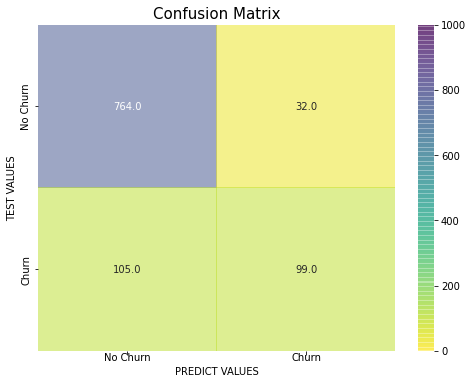

---------------------------------------------
T0 (True Not Churn): 764 (95.98%)
F0 (False Not Churn): 32 (4.02%)
T1 (True Churn): 99 (48.53%)
F1 (False Churn): 105 (51.47%)


In [125]:
recap_cm = confusion_matrix_results(mlpc)

#### Conclusion
We can see that the MLPC classifier struggled at predicting the clients that churned/exited the bank (the target that interests us most).

### MLPC_incl_LDA

#### Train/Test

In [126]:
X_tr_norm_LDA, X_te_norm_LDA, y_tr_norm_LDA, y_te_norm_LDA = train_test(X=X_norm_LDA, y=y_norm_LDA, test_size=0.1, stratify=y_norm_LDA)

#### Grid Search

In [127]:
gs_norm_LDA = grid_search(MLPClassifier(), X_tr_norm_LDA, y_tr_norm_LDA, 'MLPC_incl_LDA')

-----------------------------MLPC_incl_LDA--------------------------------
Best score: 86.1888888888889%
Parameters:
{'alpha': 0.1, 'hidden_layer_sizes': 7, 'max_iter': 1500, 'random_state': 42, 'solver': 'lbfgs'}


#### Model

In [129]:
mlpc_LDA = model_evaluation(X_tr_norm_LDA, X_te_norm_LDA, y_tr_norm_LDA, y_te_norm_LDA, model=MLPClassifier(**gs_norm_LDA))

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\neural

#### Accuracy

In [130]:
print(f'TRAIN accuracy: {mlpc_LDA[0]} %')
print(f'TEST accuracy_norm: {mlpc_LDA[1]} %')

TRAIN accuracy: 86.9 %
TEST accuracy_norm: 87.4 %


#### Classification Report

In [131]:
print(f'Classification Report')
print(f'{mlpc_LDA[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92       796
         1.0       0.82      0.49      0.61       204

    accuracy                           0.87      1000
   macro avg       0.85      0.73      0.77      1000
weighted avg       0.87      0.87      0.86      1000



#### Confusion Matrix

Confusion Matrix
[[775  21]
 [105  99]]
---------------------------------------------


<Figure size 1080x720 with 0 Axes>

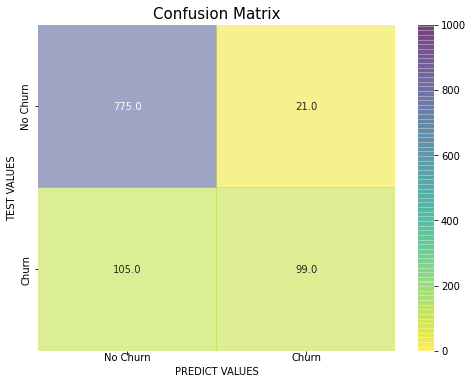

---------------------------------------------
T0 (True Not Churn): 775 (97.36%)
F0 (False Not Churn): 21 (2.64%)
T1 (True Churn): 99 (48.53%)
F1 (False Churn): 105 (51.47%)


In [133]:
recap_cm_LDA = confusion_matrix_results(mlpc_LDA)

#### Conclusions
We can see that adding LDA to the original dataset does not improve the performance of the MLPC classifier but actually makes it worse.

### MLPC_Resampled_Data (SMOTEtomek)

## Unbalance Data

We use the `Churn_Norm.csv` dataset to extimate how much is the dataset unbalanced (percentage of churn (Exit clients) / No churn (Not Exited Clients)).

In [6]:
churn = churn_norm["Exited"].value_counts()[0]
no_churn = churn_norm["Exited"].value_counts()[1]
perc_churn = round(churn*100/len(churn_norm),2)
perc_no_churn = round(no_churn*100/len(churn_norm),2)

print(f'Distribuition f the clients: {perc_churn}% Churn, {perc_no_churn}% No Churn. The dataset is unbalanced.')

Distribuition f the clients: 79.63% Churn, 20.37% No Churn. The dataset is unbalanced.


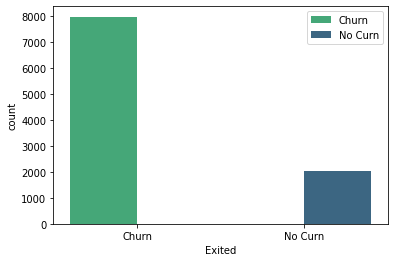

In [7]:
# Viz Exited/Not exited clients
ax = sns.countplot(x=churn_norm["Exited"],hue=churn_norm["Exited"],palette="viridis_r");

exited = ["Churn", "No Curn"]

ax.set_xticklabels(exited)
ax.legend(exited) 
plt.show()

### TSNE t-distributed Stochastic Neighbor Embedding

**TSNE** t-distributed Stochastic Neighbor Embedding

In [8]:
X_embedded = TSNE(n_components=2).fit_transform(X_norm)
X_embedded.shape

(10000, 2)

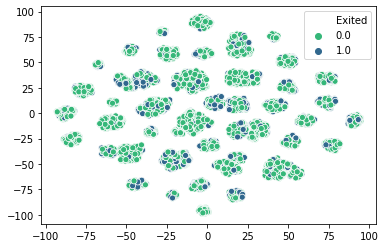

In [9]:
sns.scatterplot(x=X_embedded[:,0],y=X_embedded[:,1], hue=churn_norm['Exited'], palette='viridis_r');

#### Conclusion
There is no clear separation between the two groups.

## Function Resampling

In [10]:
def resampling_df (df, target, scaler):
    
    """
    Function that returns:
    - Resampled dataset
    - TSNE
    """
    
    X = df.drop(target, axis = 1)
    y = df[target]
    
    # Train/Test split (90/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=0, stratify=y)
    # Scaler
    X_res, y_res = scaler.fit_sample(X_train, y_train.ravel())
    
    # Count new values
    count = Counter(y_res)
    print(f'Original dataset shape: {Counter(y_train)}')
    print(f'Resampled dataset shape: {Counter(y_res)}')
          
    # TSNE
    X_embedded = TSNE(n_components=2).fit_transform(X_res)

    # Viz distribution
    sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_res, palette='viridis')
    plt.legend(loc='best')
    plt.show()
    
    df_red = pd.DataFrame(X_res, columns = df.columns[:-1])
    df_red[target] = y_res
    
    return df_red

### Under-Sampling

**Near Miss** is an under-sampling technique. It aims to balance class distribution by randomly eliminating majority class examples.

- **NearMiss-1**: Majority class examples with minimum average distance to three closest minority class examples.

Original dataset shape: Counter({0.0: 7167, 1.0: 1833})
Resampled dataset shape: Counter({0.0: 1833, 1.0: 1833})


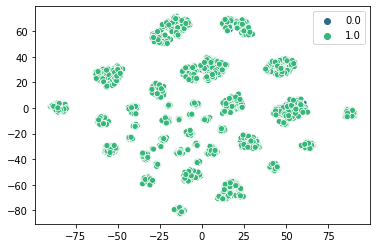

In [11]:
nm_1 = resampling_df (churn_norm, "Exited", NearMiss(version=1))

### Over-Sampling

**SMOTE** is an oversampling method that synthesizes new plausible examples in the majority class.

Original dataset shape: Counter({0.0: 7167, 1.0: 1833})
Resampled dataset shape: Counter({0.0: 7167, 1.0: 7167})


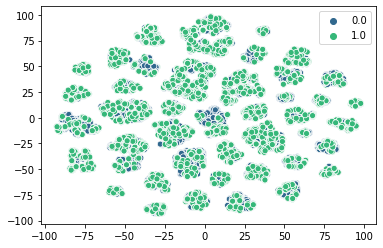

In [12]:
smote = resampling_df (churn_norm, "Exited", SMOTE(random_state = 2))

### Combine Sampling Technique

**SMOTEtomek** is a combination of **SMOTE** and **Tomek Links** to balance our data.

- **SMOTE** is an oversampling method that synthesizes new plausible examples in the majority class.

- **Tomek Links** is an undersampling method that remove unwanted overlap between classes where majority class links are removed until all minimally distanced nearest neighbor pairs are of the same class.

Original dataset shape: Counter({0.0: 7167, 1.0: 1833})
Resampled dataset shape: Counter({0.0: 7046, 1.0: 7046})


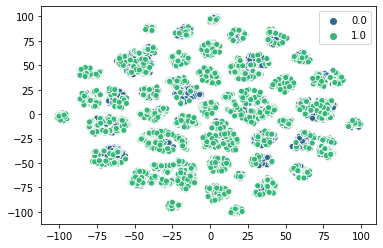

In [13]:
smote_tomek = resampling_df (churn_norm, "Exited", SMOTETomek())

### Conclusions

Resampling techniques tested are not able to separate targets into two groups in a two-dimensional problem.

Even if all the resampling techniques are similar, we consider that the most effective one is: **SMOTEtomek**

In [14]:
smote_tomek.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Int,Geography_Germany,Geography_Spain
0,0.620,0.067568,0.6,0.661904,0.333333,0.0,0.0,0.452459,0.0,1.0,1.0,0.0
1,0.554,0.256757,0.7,0.587336,0.000000,1.0,1.0,0.665165,0.0,1.0,1.0,0.0
2,0.522,0.472973,0.7,0.000000,0.333333,0.0,1.0,0.782494,1.0,1.0,0.0,0.0
3,0.672,0.391892,0.5,0.681296,0.000000,1.0,0.0,0.865924,1.0,1.0,1.0,0.0
4,1.000,0.175676,0.6,0.526097,0.333333,1.0,1.0,0.893765,0.0,0.0,0.0,0.0


In [15]:
# Dimensions
print(f'Original dataset rows: {len(churn_norm)}')
print(f'Resampled dataset rows: {len(smote_tomek)}')

Original dataset rows: 10000
Resampled dataset rows: 14092


In [16]:
# Variables
X_smote_tomek = smote_tomek.drop(['Exited'],axis=1)
# Target
y_smote_tomek = pd.DataFrame(smote_tomek['Exited'])

#### Train/Test (90/10)

In [134]:
X_tr_smote_tomek, X_te_smote_tomek, y_tr_smote_tomek, y_te_smote_tomek = train_test(X=X_smote_tomek, y=y_smote_tomek, test_size=0.1, stratify=y_smote_tomek)

#### Grid Search

In [139]:
gs_norm_smote_tomek = grid_search(MLPClassifier(max_iter=10000), X_tr_smote_tomek, y_tr_smote_tomek, 'MLPC_Resampled_Data (SMOTEtomek)')

----------------------------------MLPC_Resampled_Data (SMOTEtomek)-------------------------------------
Best score: 80.192%
Parameters:
{'alpha': 0.01, 'hidden_layer_sizes': 11, 'max_iter': 1500, 'random_state': 42, 'solver': 'adam'}


#### Model

In [140]:
mlpc_smote_tomek = model_evaluation(X_tr_smote_tomek, X_te_smote_tomek, y_tr_smote_tomek, y_te_smote_tomek, model=MLPClassifier(**gs_norm_smote_tomek))

D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ANACONDA\lib\site-packages\sklearn\utils\

#### Accuracy

In [141]:
print(f'TRAIN accuracy: {mlpc_smote_tomek[0]} %')
print(f'TEST accuracy_norm: {mlpc_smote_tomek[1]} %')

TRAIN accuracy: 80.18 %
TEST accuracy_norm: 80.35 %


#### Classification Report

In [142]:
print(f'Classification Report')
print(f'{mlpc_smote_tomek[2]}')

Classification Report
              precision    recall  f1-score   support

         0.0       0.80      0.81      0.81       705
         1.0       0.81      0.79      0.80       705

    accuracy                           0.80      1410
   macro avg       0.80      0.80      0.80      1410
weighted avg       0.80      0.80      0.80      1410



#### Confusion Matrix

Confusion Matrix
[[574 131]
 [146 559]]
---------------------------------------------


<Figure size 1080x720 with 0 Axes>

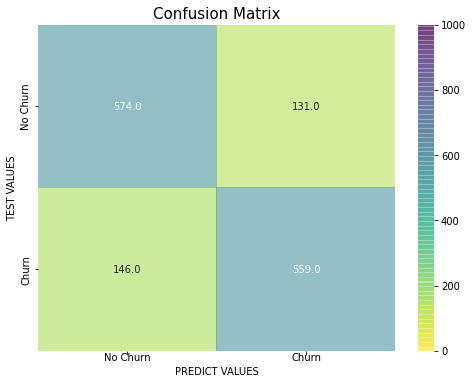

---------------------------------------------
T0 (True Not Churn): 574 (81.42%)
F0 (False Not Churn): 131 (18.58%)
T1 (True Churn): 559 (79.29%)
F1 (False Churn): 146 (20.71%)


In [143]:
recap_cm_smote_tomek = confusion_matrix_results(mlpc_smote_tomek)

#### Conclusions
We can see that the MLPC classifier for resampled data is so far the best algorithm at predicting the clients that churned/exited the bank.

## Conclusions

### Cross Validation MLPC

In [144]:
def cross_validation_score (model):
    
    '''
    Function that caluclates the recall score
    '''
    recall_score = model[4]
    
    print(f'Cross Validation Score (Median): {recall_score} --> {round(np.median(recall_score)*100,2)}% recall')
    print(f'Numbers of Score Calculations: {len(recall_score)}')
    
    return round(np.median(recall_score)*100,2)

#### 1. MLPC_not_incl_LDA

In [145]:
recall_score = cross_validation_score (mlpc)

Cross Validation Score (Median): [0.47683924 0.40326975 0.5013624  0.50546448 0.45355191] --> 47.68% recall
Numbers of Score Calculations: 5


#### 2. MLPC_incl_LDA

In [146]:
recall_score_LDA = cross_validation_score (mlpc_LDA)

Cross Validation Score (Median): [0.49591281 0.47411444 0.49318801 0.46174863 0.49453552] --> 49.32% recall
Numbers of Score Calculations: 5


#### 3. MLPC_Resampled_Data (SMOTEtomek)

In [147]:
recall_score_smote_tomek = cross_validation_score (mlpc_smote_tomek)

Cross Validation Score (Median): [0.78329393 0.81545741 0.74132492 0.77287066 0.79574132] --> 78.33% recall
Numbers of Score Calculations: 5


## Conclusion
The best model for a **Neuronal Network Analysis** is the one that uses **resampled data** with:. 

In [148]:
print(f'TRAIN accuracy: {mlpc_smote_tomek[0]} %')
print(f'TEST accuracy_norm: {mlpc_smote_tomek[1]} %')

print(40*"-")
print(f'Median recall: {cross_validation_score (mlpc_smote_tomek)} %')

TRAIN accuracy: 80.18 %
TEST accuracy_norm: 80.35 %
----------------------------------------
Cross Validation Score (Median): [0.78329393 0.81545741 0.74132492 0.77287066 0.79574132] --> 78.33% recall
Numbers of Score Calculations: 5
Median recall: 78.33 %
